<a href="https://colab.research.google.com/github/Eunjane/J-sMathematical.github.io-/blob/main/Lab9_Park.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 9: Regression for Prediction (30 points)**

#### **WRITE YOUR NAME HERE**


---
**Instructions**: Complete the lab below.
- <font color=red>Tasks</font> indicated in red must be completed to receive credit
- Include all code for your work
- Include markdown cells with written answers explaining your work when prompted
- **NOTE: Your completed lab must be submitted to Canvas as a .ipynb file by the end of the lab session**
---




<br>




####<font color=red>Organized</font> (1 points)
* Answers should be organized in the following format for organization and readability

<br>

```
# 1. 
This will be the code block to answer the first part of a task
```

1. This will be the text answer/explanation (if prompted) for the first task

```
# 2. 
This will be the code block to answer the second part of a task in a separate code cell
```

2. This will be the text answer/explanation (if prompted) for the second task

<br>

Continue this format for the remaining subtasks


<br>

---

<br>






The goal of this lab is to 
1. build a regression model to *accurately* predict median housing price and 
2. interpret the variables included in your best regression model.

<br>

Variable descriptions are found below:

  * `crim` - per capita crime rate by town.

  * `zn` - proportion of residential land zoned for lots over 25,000 sq.ft.

  * `indus` - proportion of non-retail business acres per town.

  * `chas` - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

  * `nox` - nitrogen oxides concentration (parts per 10 million).

  * `rm` - average number of rooms per dwelling.

  * `age` - proportion of owner-occupied units built prior to 1940.

  * `dis` - weighted mean of distances to five Boston employment centres.

  * `rad` - index of accessibility to radial highways.

  * `tax` - full-value property-tax rate per \$10,000.

  * `ptratio` - pupil-teacher ratio by town.

  * `black` - 1000(Bk - 0.63)^2 where Bk is the proportion of black individuals by town.

  * `lstat` - lower status of the population (percent).

  * `medv` - median value of owner-occupied homes in \$1000s.

<br>

---

<br>






####<font color=red>Task 0</font>  (1 points)

1. Load the Boston Housing dataset at the following [link](https://raw.githubusercontent.com/khasenst/datasets_teaching/main/HousingData.csv)

2. Remove all NAs from the dataset using `na.omit()`

In [ ]:
# load the dataset
dat <- read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/HousingData.csv")
dat1 <- na.omit(dat)
head(dat1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1


<br>

---

<br>






####<font color=red>Task 1</font>  (3 points)

1. Randomly partition the dataset into training and validation sets as done in lecture. 
  * Use `set.seed(10)`
  * The training dataset `train` should have 300 rows
  * The validation set `valid` should have 94 rows
  * None of the rows in the training dataset should be in the validation dataset

In [ ]:
#1.1
set.seed(10)

samp <- sample(1:nrow(dat1), 300 )
train <- dat1[samp,  ]
nrow(train)


valid <- dat1[-samp,]
nrow(valid)

[1] 300

[1] 94

<br>

---

<br>






####<font color=red>Task 2</font>  (10 points)

1. Using the `train` dataset, create scatterplots and boxplots, whichever appropriate, to explore the relationship between median housing price `MEDV` (y-axis) and other variables in the dataset. Describe what you observe in complete sentences.
  * I would like to see at least 5 plots/explanations, however, I would try plotting all variables!
  * This portion of the analysis usually takes the longest (1 hour)


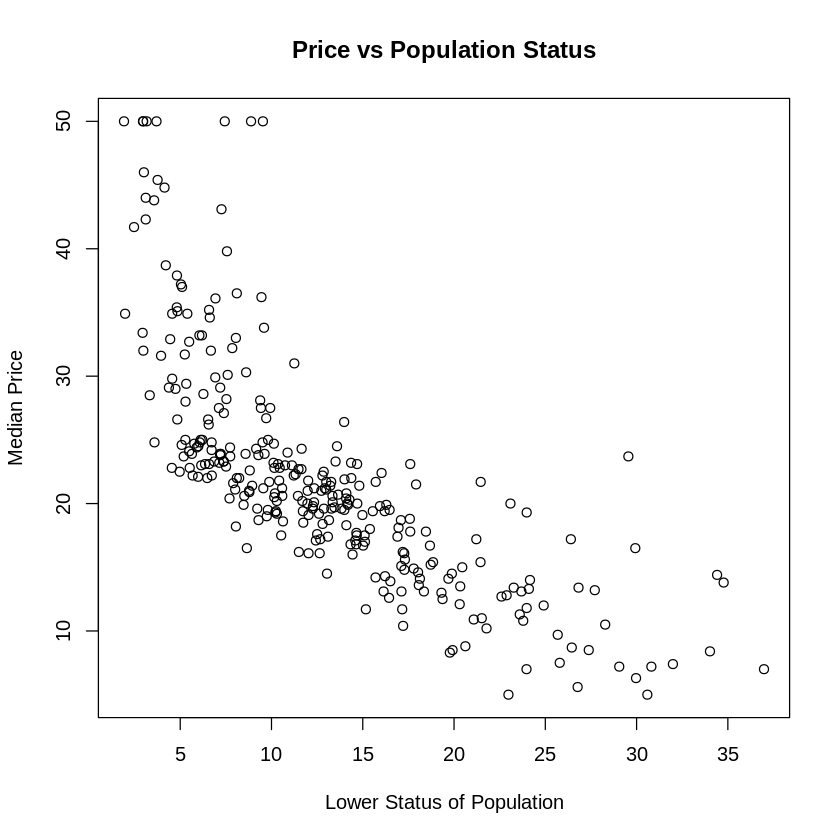

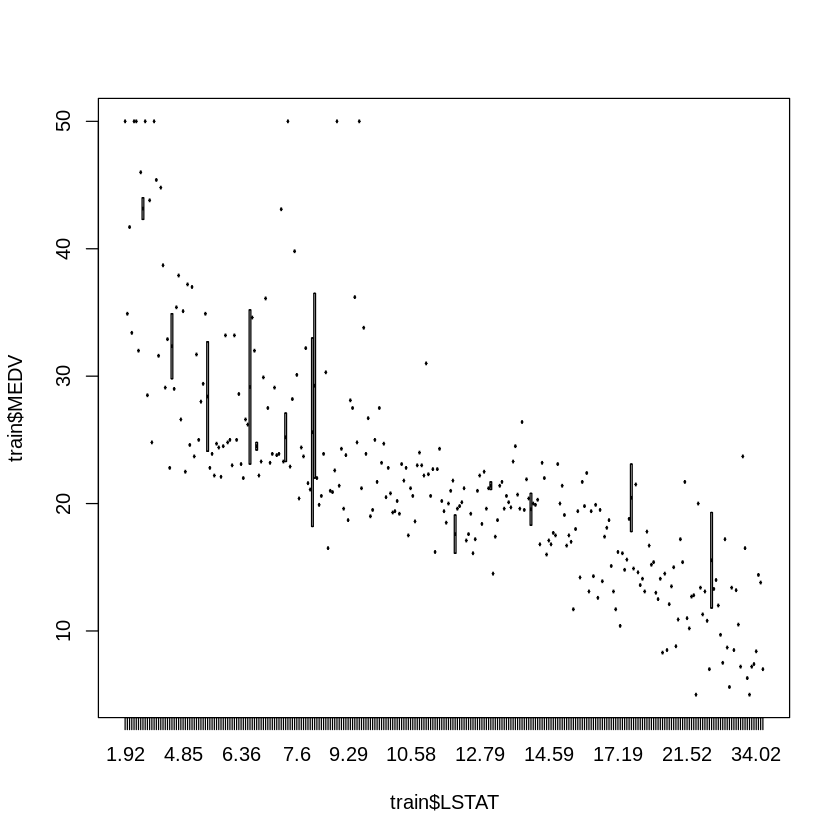

In [ ]:
#2.1
plot(train$LSTAT, train$MEDV,
     xlab = "Lower Status of Population",
     ylab = "Median Price",
     main = "Price vs Population Status")

boxplot(train$MEDV ~ train$LSTAT)

Through the scatter plot, it looks linear. As higher population status the median price is going to decrease. By box plot it didn't show up exact box plot but we can assume high LSTAT leads to low MEDV by the points.   

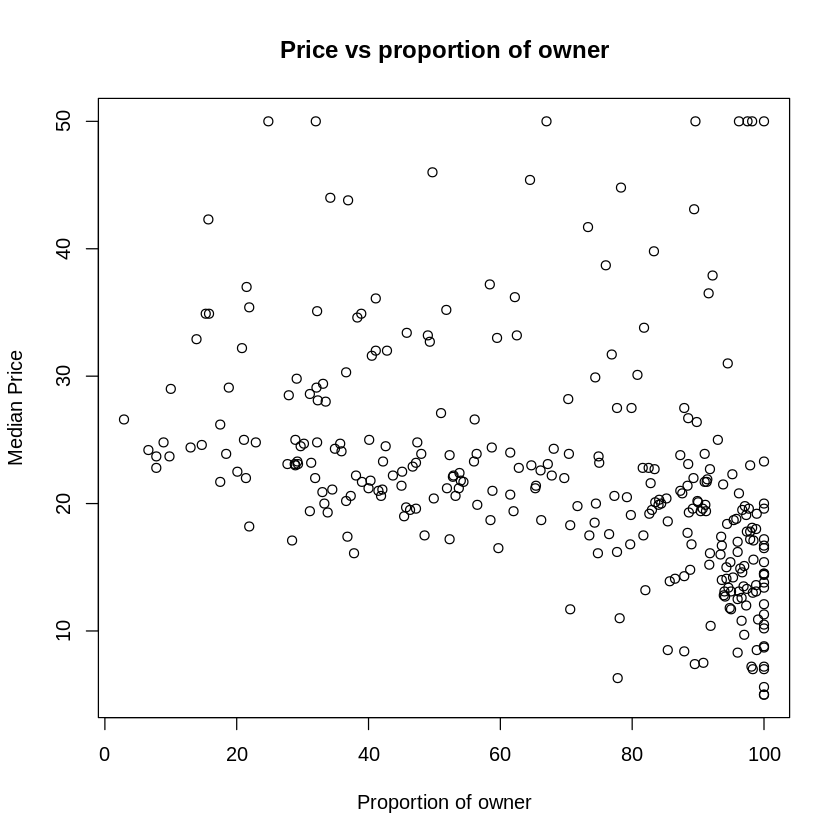

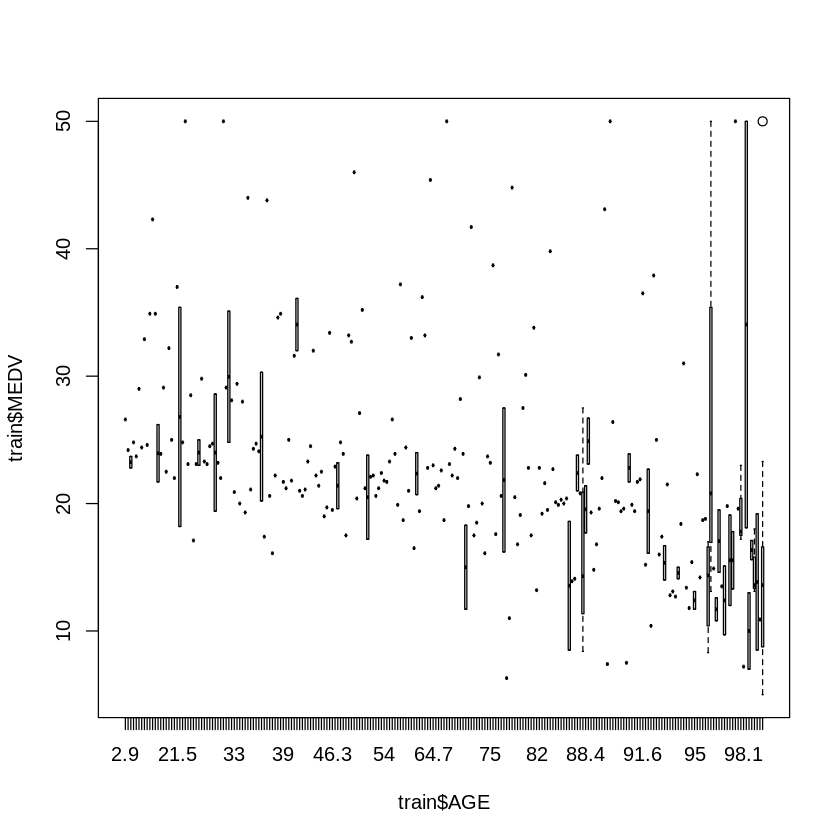

In [ ]:
plot(train$AGE, train$MEDV,
     xlab = "Proportion of owner",
     ylab = "Median Price",
     main = "Price vs proportion of owner")

boxplot(train$MEDV ~ train$AGE)

Not sure to recognize it is linear or not, but around 98.1 of AGE there are various range of MEDV. 

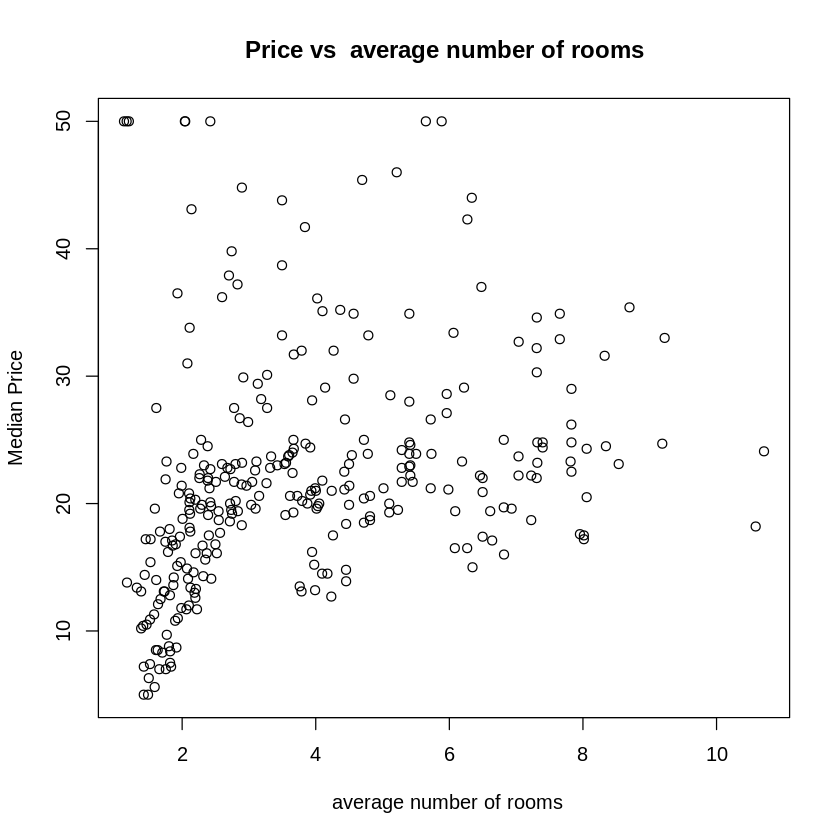

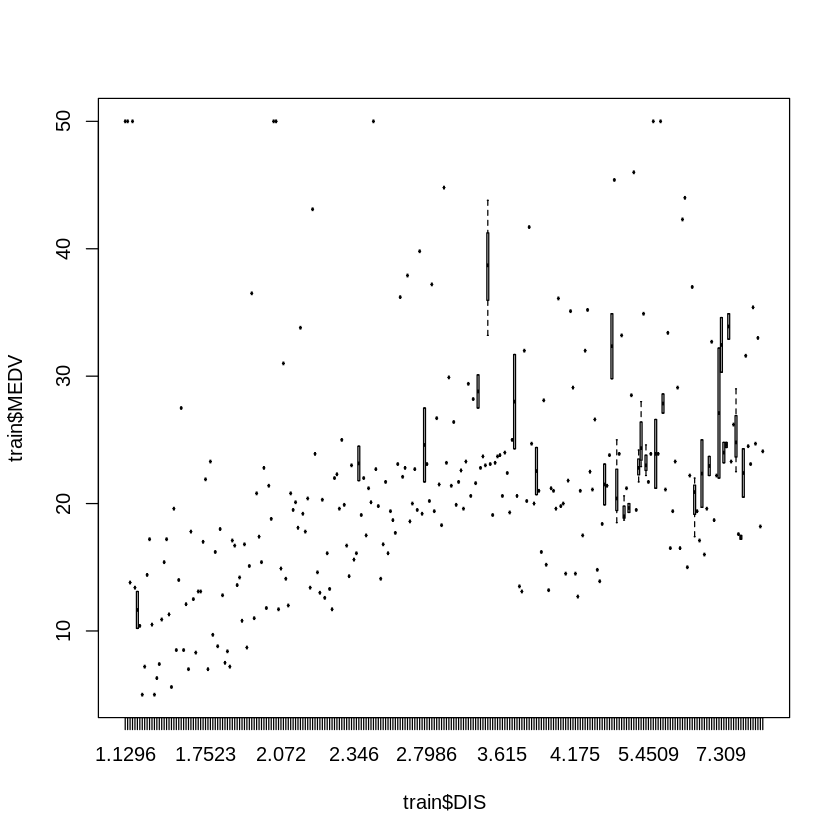

In [ ]:
plot(train$DIS, train$MEDV,
     xlab = " average number of rooms",
     ylab = "Median Price",
     main = "Price vs  average number of rooms")

boxplot(train$MEDV ~ train$DIS)

According to both plots, as DIS goes up MEDV tends to go up. 

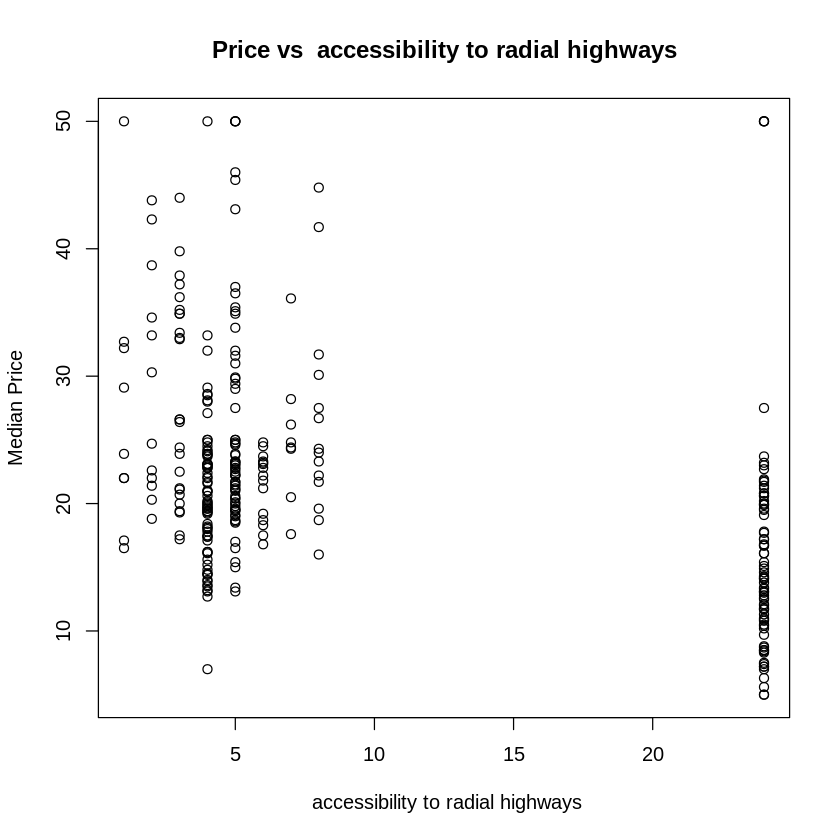

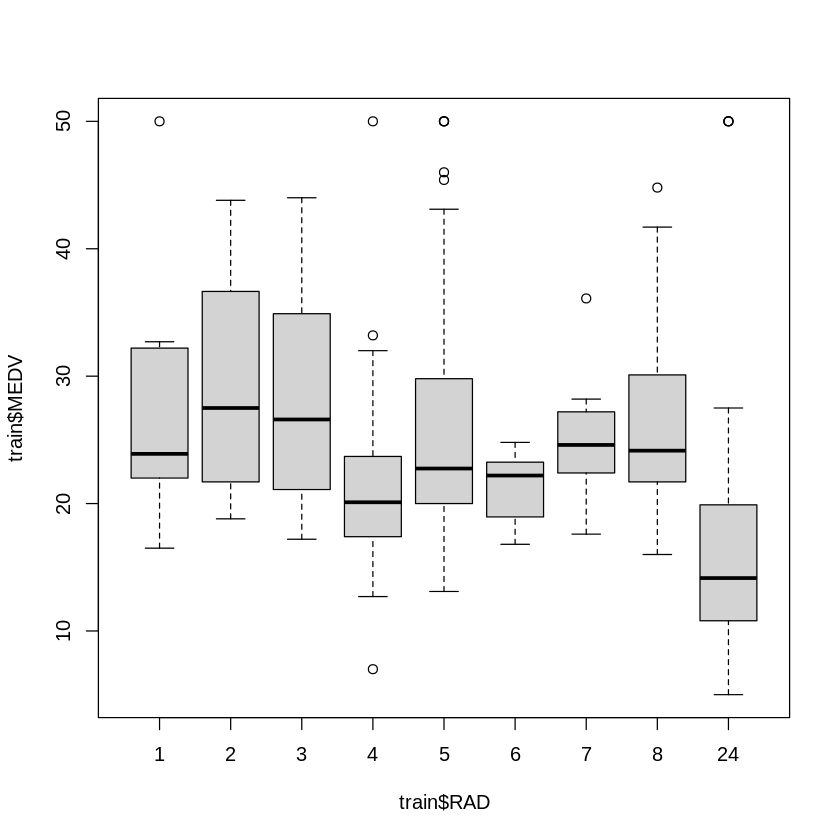

In [ ]:
plot(train$RAD, train$MEDV,
     xlab = " accessibility to radial highways",
     ylab = "Median Price",
     main = "Price vs  accessibility to radial highways")

boxplot(train$MEDV ~ train$RAD)

When the RAD is the highest, the median of MEDV is lowest and there is oulier. 

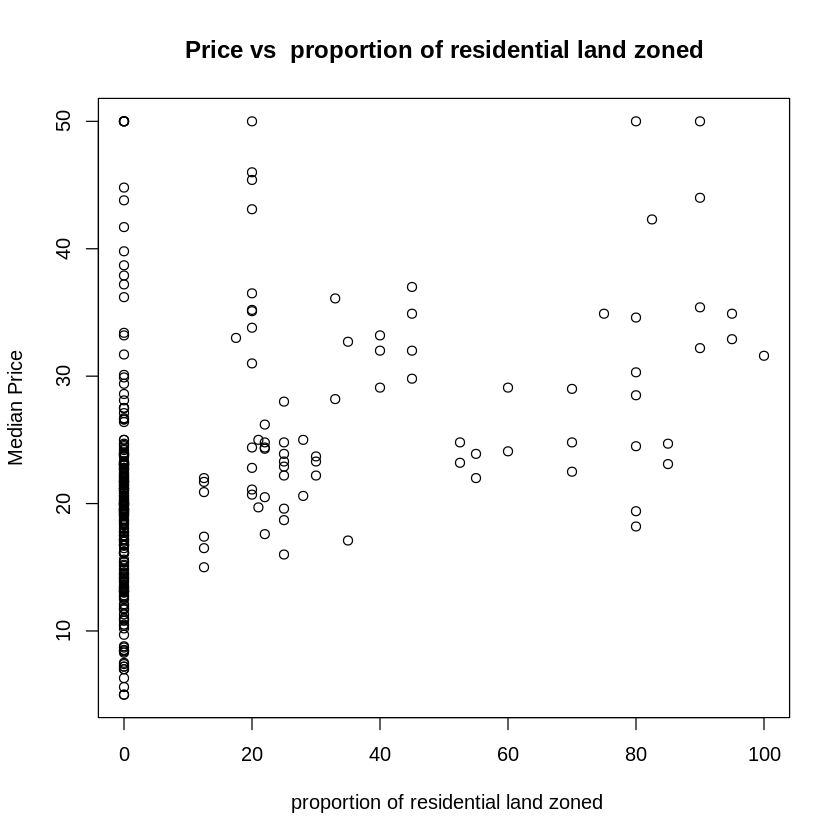

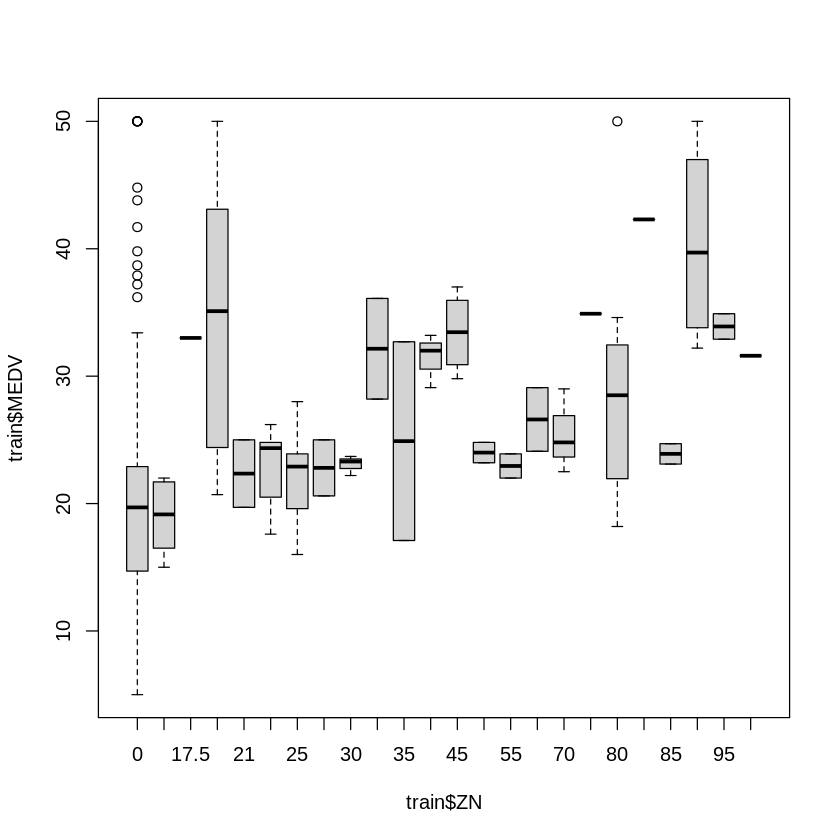

In [ ]:
plot(train$ZN, train$MEDV,
     xlab = " proportion of residential land zoned",
     ylab = "Median Price",
     main = "Price vs  proportion of residential land zoned")

boxplot(train$MEDV ~ train$ZN)

About the lowest ZN, there are various ouliers along with wide range. As higher ZN the MEDV is going to high. 

<br>

---

<br>






####<font color=red>Task 3</font>  (10 points)

1. Using the `train` dataset, fit regressions with multiple independent variables, using `MEDV` as the dependent variable, based on your visual observations
  * Try several (many!) regression models
  * Determine appropriate functional forms (quadratic? 1/x?)
  * Use combinations of many variables

2. Select the model (that was fit using `train`) that produced the lowest mean squared error on your validation dataset `valid`.

In [ ]:
#3.1
fit <- lm(MEDV ~ LSTAT, data = train)

summary(fit)


Call:
lm(formula = MEDV ~ LSTAT, data = train)

Residuals:
   Min     1Q Median     3Q    Max 
-9.598 -3.758 -1.287  1.670 24.747 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.40181    0.70798   48.59   <2e-16 ***
LSTAT       -0.96004    0.04864  -19.74   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.916 on 298 degrees of freedom
Multiple R-squared:  0.5666,	Adjusted R-squared:  0.5652 
F-statistic: 389.6 on 1 and 298 DF,  p-value: < 2.2e-16


In [ ]:
fit_quadratic <- lm(MEDV ~ LSTAT + I(LSTAT^2), data = train)
summary(fit_quadratic)


Call:
lm(formula = MEDV ~ LSTAT + I(LSTAT^2), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0475  -3.7011  -0.5316   2.3211  25.4340 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.060892   1.142271  36.822  < 2e-16 ***
LSTAT       -2.205521   0.159864 -13.796  < 2e-16 ***
I(LSTAT^2)   0.038799   0.004787   8.105 1.39e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.363 on 297 degrees of freedom
Multiple R-squared:  0.6451,	Adjusted R-squared:  0.6427 
F-statistic:   270 on 2 and 297 DF,  p-value: < 2.2e-16


In [ ]:
#3.2
fit <- lm(MEDV ~ LSTAT, data = train)

prediction <- predict(fit, train)
truth      <- train$MEDV

# calculate MSE
mse <- function(true, pred) {
  return(mean((true - pred)^2))
}
mse(truth, prediction)

# root mean squared error
sqrt(mse(truth, prediction))

[1] 34.76811

[1] 5.896449

In [ ]:
confint(fit)

,2.5 %,97.5 %
(Intercept),33.008532,35.7950866
LSTAT,-1.055753,-0.8643235


<br>

---

<br>






####<font color=red>Task 4</font>  (5 points)

1. Interpret your best performing model from Task 3.
  * This should include interpretation of slopes, p-values, and confidence intervals in the context of the dataset

 According to adjusted  R^2, quadratic regression is better fit.
The slope parameter for LSTAT is significantly different from zero since the slope p-value = 2.2e-16 <0.05. 
The true population intercept is within the interval [33.01, 35.80] with 95% probability. 
The true population slope is within the interval [-1.06, -0.86] with 95% probability